In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

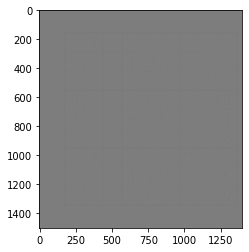

In [23]:
img = cv2.imread("sudoku.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

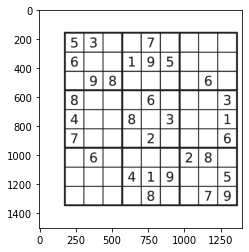

In [24]:
img = cv2.equalizeHist(img)

plt.imshow(img, cmap="gray")

In [26]:
rows, cols = img.shape

def search_for_top_left_pixel():
    for i in range(0, rows, 1):
        for j in range(0, cols, 1):
            if img[i, j] != 255:
                print("Hooora!, i can find that")
                return i, j

x1, y1 = search_for_top_left_pixel()

Hooora!, i can find that


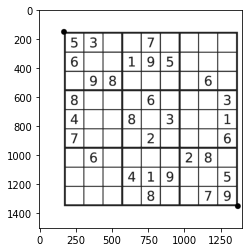

In [21]:
cv2.circle(img, (1371, 1349), 20, (0, 0, 0), -1)

plt.imshow(img, cmap="gray")

In [ ]:
cv2.imwrite("result.jpg", img)

True

In [27]:
def search_for_bottom_right_pixel():
    for i in range(rows-1, 0, -1):
        for j in range(cols-1, 0, -1):
            if img[i, j] != 255:
                return i, j
            
x2, y2 = search_for_bottom_right_pixel()

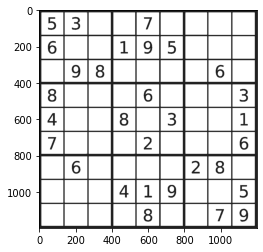

In [28]:
img_sudoku = img[x1:x2, y1:y2]

plt.imshow(img_sudoku, cmap="gray")

In [29]:
width, height = img_sudoku.shape
print(width, height)

1199 1199


In [31]:
cell_width = width // 9
cell_height = height // 9
print(cell_width, cell_height)

133 133


In [57]:
def count_none_white_pixels(img):
    rows, cols = img.shape
    dah_darsad_rows = rows // 10
    dah_darsad_cols = cols // 10
    
    counter = 0
    for i in range(dah_darsad_rows, rows - dah_darsad_rows):
        for j in range(dah_darsad_cols, cols - dah_darsad_cols):
            if img[i, j] != 255:
                counter += 1
    
    return counter

In [61]:
counter = 0

a = (cell_width * cell_height) / 35

for i in range(0, width, cell_width):
    for j in range(0, height, cell_height):
        small_img = img_sudoku[i:i+cell_width , j:j+cell_height]
        if small_img.shape == (cell_width, cell_height):
            if count_none_white_pixels(small_img) > a:
                cv2.imwrite(f"cells/{counter}.jpg", small_img)
                counter += 1